In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mo7amed/barcode-and-qr-code-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 332M/332M [00:02<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mo7amed/barcode-and-qr-code-image-dataset/versions/4


In [8]:
# 1. Install the underlying C library (zbar)
!sudo apt install libzbar0

# 2. Install the Python libraries
!pip install kagglehub pyzbar opencv-python-headless

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
libzbar0 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.


In [9]:
import kagglehub
import os
import cv2
from pyzbar.pyzbar import decode
from google.colab.patches import cv2_imshow
import numpy as np

print("Libraries imported.")

# Download latest version
print("Downloading dataset...")
path = kagglehub.dataset_download("mo7amed/barcode-and-qr-code-image-dataset")

print(f"\nDataset downloaded to: {path}")

Libraries imported.
Using Colab cache for faster access to the 'barcode-and-qr-code-image-dataset' dataset.

Dataset downloaded to: /kaggle/input/barcode-and-qr-code-image-dataset


In [10]:
# Find sample images to process
sample_images = []
num_samples = 10 # Let's process 10 images
count = 0

# We'll walk the directory to find images
for root, dirs, files in os.walk(path):
    if count >= num_samples:
        break
    for file in files:
        if count >= num_samples:
            break
        if file.endswith(('.png', '.jpg', '.jpeg')):
            sample_images.append(os.path.join(root, file))
            count += 1

print(f"Found {len(sample_images)} sample images to process.")
if sample_images:
    print(f"Example path: {sample_images[0]}")

Found 10 sample images to process.
Example path: /kaggle/input/barcode-and-qr-code-image-dataset/Dataset/BarCode-QRCode/BarCodeQRCode104.png


--- Processing: BarCodeQRCode104.png ---
No barcodes or QR codes found.


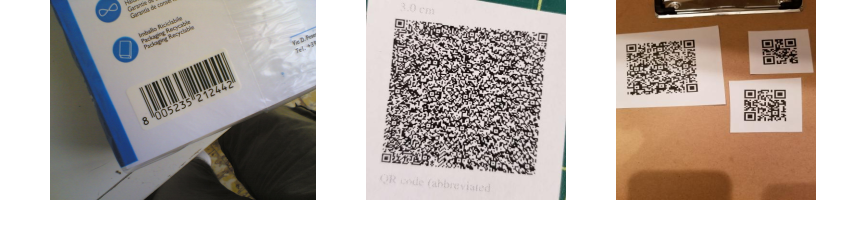

------------------------------
--- Processing: BarCodeQRCode015.png ---
Detected Type: CODABAR
Decoded Data:  A12345A


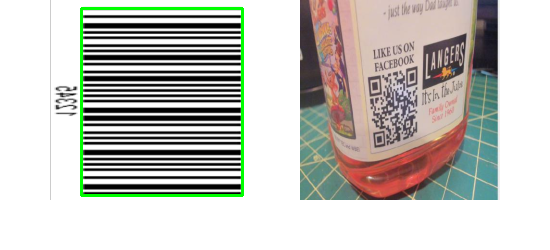

------------------------------
--- Processing: BarCodeQRCode124.png ---
Detected Type: QRCODE
Decoded Data:  http://delivr.com/16mrr_qr
Detected Type: CODABAR
Decoded Data:  A01234B


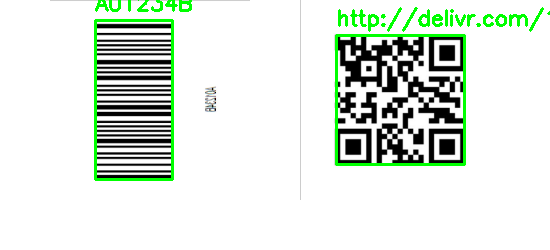

------------------------------
--- Processing: BarCodeQRCode145.png ---
No barcodes or QR codes found.


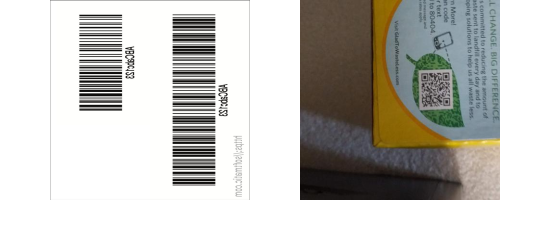

------------------------------
--- Processing: BarCodeQRCode061.png ---
Detected Type: QRCODE
Decoded Data:  This is a computer generated QR Code
Detected Type: EAN13
Decoded Data:  4902030024888


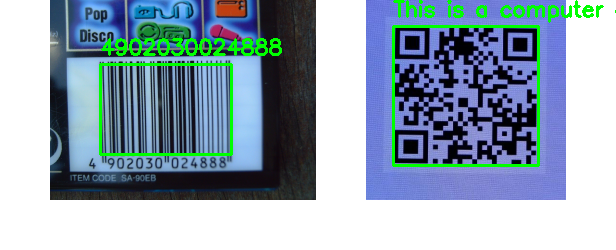

------------------------------
--- Processing: BarCodeQRCode116.png ---
No barcodes or QR codes found.


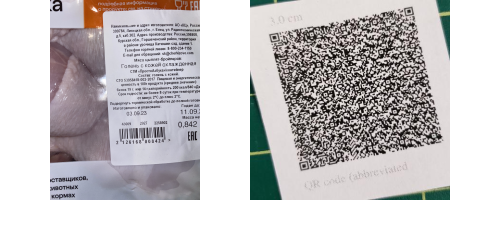

------------------------------
--- Processing: BarCodeQRCode053.png ---
Detected Type: QRCODE
Decoded Data:  VERSION 2 8CM
Detected Type: EAN13
Decoded Data:  4902030187590


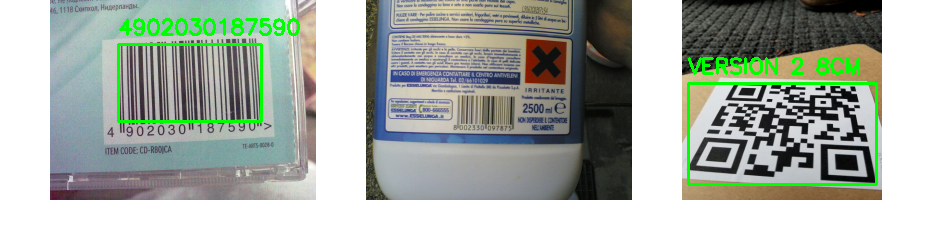

------------------------------
--- Processing: BarCodeQRCode103.png ---
Detected Type: QRCODE
Decoded Data:  VERSION 2 8CM


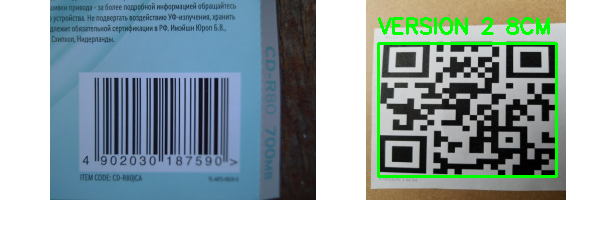

------------------------------
--- Processing: BarCodeQRCode063.png ---
No barcodes or QR codes found.


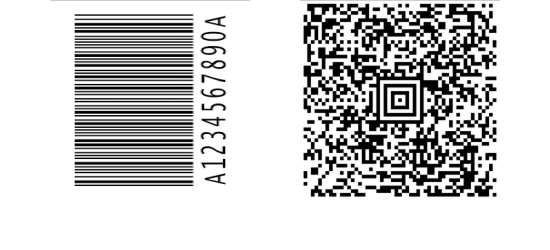

------------------------------
--- Processing: BarCodeQRCode101.png ---
Detected Type: QRCODE
Decoded Data:  http://www.youtube.com/watch?v=7qa6Bho4OyM&feature=share&list=PLk13TE2t32tgRCVo0q8tTB1CyZyMDQCNH&index=10
Detected Type: CODE128
Decoded Data:  987654321


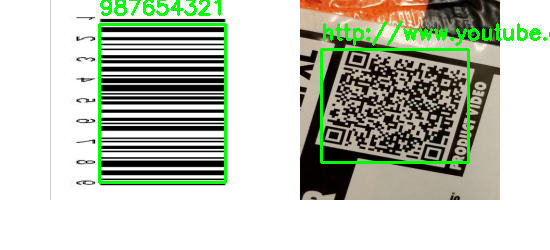

------------------------------


In [11]:
for image_path in sample_images:
    print(f"--- Processing: {image_path.split('/')[-1]} ---")

    # Read the image
    image = cv2.imread(image_path)

    if image is None:
        print("Could not read image.")
        continue

    # Use pyzbar's decode function to find all codes
    decoded_objects = decode(image)

    if not decoded_objects:
        print("No barcodes or QR codes found.")

    # Loop over all detected objects
    for obj in decoded_objects:
        # Get the decoded data (as a string)
        data = obj.data.decode('utf-8')
        obj_type = obj.type

        print(f"Detected Type: {obj_type}")
        print(f"Decoded Data:  {data}")

        # Get the bounding box coordinates
        # obj.rect gives (left, top, width, height)
        (x, y, w, h) = obj.rect

        # Draw a green rectangle around the detected code
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Put the decoded text on the image
        cv2.putText(image, data, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Show the image with annotations
    cv2_imshow(image)
    print("-" * 30)